In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.metrics import classification_report

In [2]:
# Load data set that excluded some unimportant features
data_df = pd.read_csv('rearranged_optimal_data_set.csv')

In [3]:
# Split the data
np.random.seed(101)
data = np.random.permutation(data_df)
train, validate, test = np.split(data, [int(.7*len(data)), int(.9*len(data))])

X_train = train[:, :-1]
Y_train = train[:, -1]
X_test = validate[:, :-1]
Y_test = validate[:, -1]
X_final = test[:, :-1]
Y_final = test[:, -1]

print(X_train.shape)
print(X_test.shape)
print(X_final.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_final.shape)

(28831, 81)
(8238, 81)
(4119, 81)
(28831,)
(8238,)
(4119,)


In [4]:
# Use GridSearchCV to tune hyperparameters
parameters = {'max_depth':[1, 5, 10, 100], 'min_samples_leaf':[50, 70, 90, 100]}
clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=70,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'max_depth': 5, 'min_samples_leaf': 70},
 0.91543824355728209)

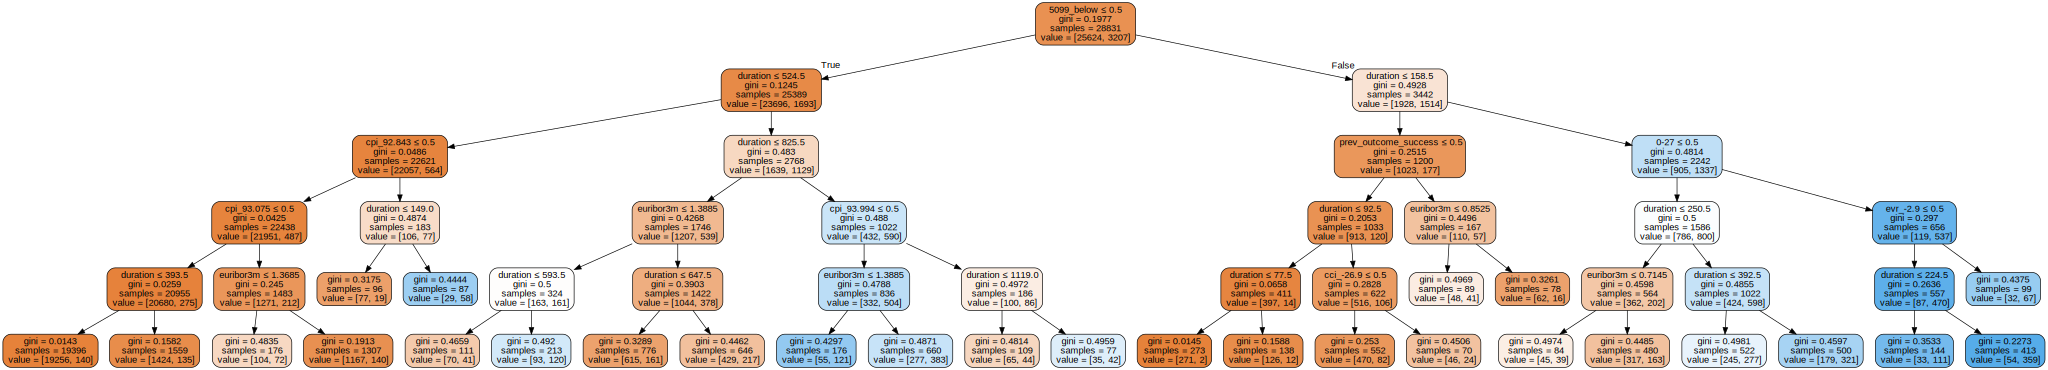

In [5]:
# Train and plot the decision tree
clf1 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=70)
fitted_tree = clf1.fit(X_train, Y_train)
dot_data = tree.export_graphviz(fitted_tree, out_file=None, 
                         feature_names=data_df.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [6]:
# Print classification report
print(classification_report(y_true=Y_test, y_pred=clf1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95      7280
        yes       0.64      0.55      0.59       958

avg / total       0.91      0.91      0.91      8238



In [7]:
# Load the whole data set
data_df2 = pd.read_csv('rearranged_whole_data_set.csv')

In [8]:
# Split the data set
np.random.seed(101)
data = np.random.permutation(data_df2)
train, validate, test = np.split(data, [int(.7*len(data)), int(.9*len(data))])

X_train = train[:, :-1]
Y_train = train[:, -1]
X_test = validate[:, :-1]
Y_test = validate[:, -1]
X_final = test[:, :-1]
Y_final = test[:, -1]

print(X_train.shape)
print(X_test.shape)
print(X_final.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_final.shape)

(28831, 102)
(8238, 102)
(4119, 102)
(28831,)
(8238,)
(4119,)


In [9]:
# Use GridSearchCV to tune hyperparameters
grid2 = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid2.fit(X_train, Y_train)
grid2.best_estimator_, grid2.best_params_, grid2.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=70,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'max_depth': 5, 'min_samples_leaf': 70},
 0.91529950400610449)

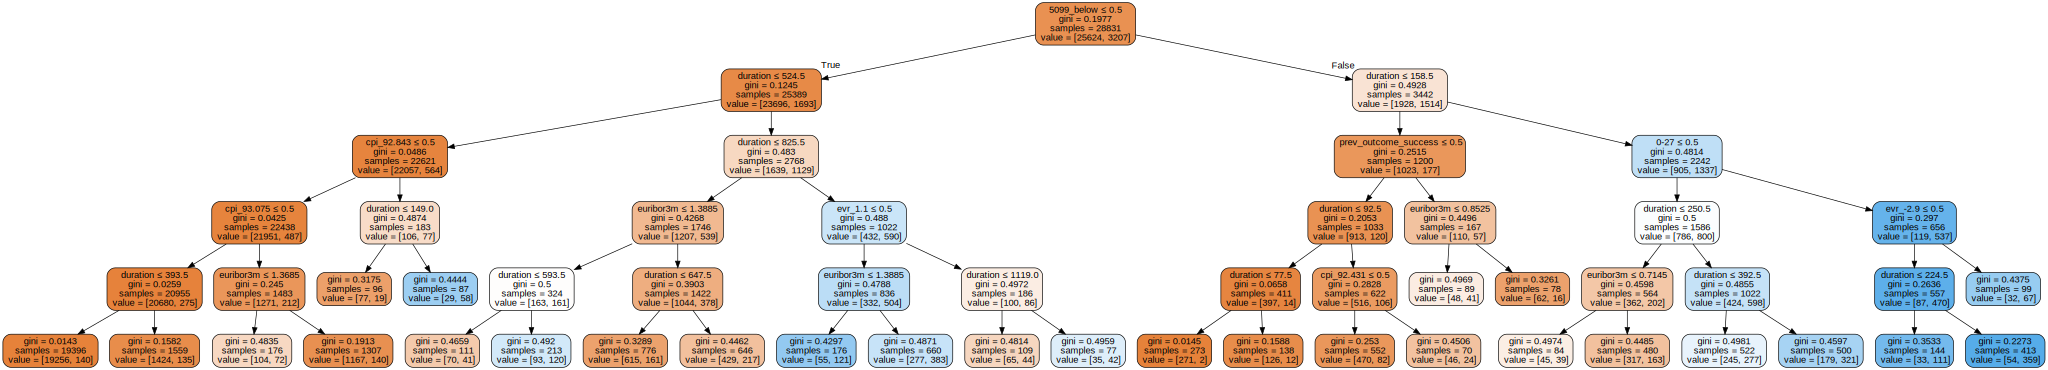

In [10]:
# Train and plot the decision tree
clf2 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=70)
fitted_tree2 = clf2.fit(X_train, Y_train)
dot_data2 = tree.export_graphviz(fitted_tree2, out_file=None, 
                         feature_names=data_df2.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2

#### The only difference comparing the decision tree graph using optimal data set and the decision tree graph using entire data set is that there are two places in the entire data set used consumer price index values as threshold while the same two places in the optimal data set used consumer confidence index as threshold. 

In [11]:
# Print classification report
print(classification_report(y_true=Y_test, y_pred=clf2.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95      7280
        yes       0.64      0.55      0.59       958

avg / total       0.91      0.91      0.91      8238



In [12]:
sum(Y_train)/len(Y_train)

0.11123443515660227

In [13]:
sum(Y_test)/len(Y_test)

0.116290361738286

## Random Forest Training Using Optimal Data Set:

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Separated GridSearchCV steps for different parameters because as n_estimators value gets larger, it takes significantly longer time to run.

In [5]:
# Tuning criterion parameter
parameters = {'criterion':['gini', 'entropy']}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 {'criterion': 'entropy'},
 0.90631611806735801)

In [6]:
# Tuning max_feature parameter
parameters = {'max_features':['auto', 'log2', 50, 80]}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=50, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 {'max_features': 50},
 0.91068641392945093)

In [21]:
# Tuning n_estimators parameter while using best max_feature parameter gained from above
parameters = {'n_estimators':[10, 100, 200]}
clf = RandomForestClassifier(max_features=50)
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=50, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 {'n_estimators': 100},
 0.9124900280947591)

In [22]:
# Train the random forest model with best parameters values
clf_forest = RandomForestClassifier(n_estimators=100, max_features=50)
clf_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
# Classification report 
print(classification_report(y_true=Y_test, y_pred=clf_forest.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95      7280
        yes       0.61      0.51      0.56       958

avg / total       0.90      0.91      0.90      8238



In [24]:
# Random forest score on validation data
clf_forest.score(X_test, Y_test)

0.90531682447195916

In [25]:
clf1 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=70)
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=70,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
# Decision tree score on validation data
clf1.score(X_test, Y_test)

0.91199320223355185